# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [23]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

Download the `Employee` dataset from the data folder

Load and save your dataset in a variable called `employees`.

In [40]:
# your code here
#doesnt read data/Employee.csv, says there is no such file or directory 
employees = pd.read_csv('C:/Users/jetsa/data_analytics202103_module_2/labs/module_2/Pivot-Table-Correlation/data/Employee.csv')
employees.head(9)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [21]:
# Method 1
employees.groupby(["Department"]).mean()


,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [24]:
# Method 2
employees.pivot_table(index = ["Department"], values = ["Salary"], aggfunc = np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [25]:
# your code here
employees.pivot_table(index = ["Department", "Title"], values = ["Salary"], aggfunc = np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [27]:
# your code here
employees.pivot_table(index = ["Title"], values = ["Salary", "Years"], aggfunc = np.mean)

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [51]:
# your code here
employees.pivot_table(index = ["Department", "Title"], values = ["Salary"], aggfunc = [len, np.mean])


len   mean
                     Salary Salary
Department Title                  
HR         VP             1   70.0
           analyst        2   32.5
IT         VP             1   70.0
           analyst        2   32.5
           associate      1   60.0
Sales      associate      2   55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [57]:
# your code here

employees.pivot_table(index = ["Department", "Title"], values = ["Salary"], aggfunc = [np.mean, np.median, min, max, np.std])

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60       NaN
Sales      associate   55.0   55.0     55     55  0.000000

In [ ]:
"""
There is too little data in the dataframe to really say anything usefull about means and stdevs: 
There is only one HR VP; one IT VP, one IT associate, which results in NaN values in the standarddeviation-column 
"""


#### Based on your comments, fill the missing values with an appropriate value.

In [58]:
# your code here
employees.pivot_table(index = ["Department", "Title"], values = ["Salary"], aggfunc = [np.mean, np.median, min, max, np.std])

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60       NaN
Sales      associate   55.0   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [59]:
# your code here
employees.pivot_table(index = ["Department", "Title"], values = ["Salary"], aggfunc = [np.mean, np.median, min, max, np.std]).fillna(0)

mean median    min    max       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60  0.000000
Sales      associate   55.0   55.0     55     55  0.000000

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [75]:
# your code here
employees.pivot_table(index = ["Department", "Title"], values = ["Salary", "Years"], aggfunc = {"Salary":np.mean, "Years":np.sum})


Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

In [74]:
#check if it goes right - it does
# test_sum_years = employees.pivot_table(index = ["Department", "Title"], values = ["Years"], aggfunc = np.sum)
# test_mean_salary = employees.pivot_table(index = ["Department", "Title"], values = ["Salary"], aggfunc = np.mean)

# print(test_sum_years, "\n")
# print(test_mean_salary, "\n")

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

Read the `Fitbit` dataset from
the `data` folder


Save your data in a variable called `fitbit`.

In [83]:
# your code here
fitbit = pd.read_csv("C:/Users/jetsa/data_analytics202103_module_2/labs/module_2/Pivot-Table-Correlation/data/Fitbit.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [97]:
# your code here
print(fitbit.dtypes)

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


In [98]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [110]:
# your code here
#Pearson is default, assumes a linear correlation
print(fitbit["Steps"].corr(fitbit["Minutes Very Active"], method='pearson'))
print(fitbit["Steps"].corr(fitbit["Minutes Very Active"], method='spearman'))
#they are different, so probably not a linear corr between the two


0.5714518481062608
0.6321453084956241


#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [111]:
import matplotlib.pyplot as plt;

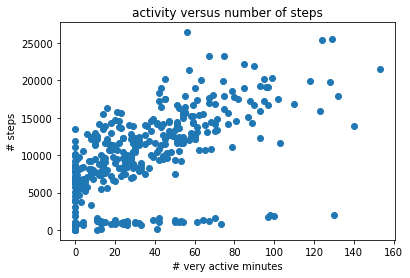

In [115]:

plt.scatter(fitbit["Minutes Very Active"], fitbit["Steps"])
plt.title('activity versus number of steps')
plt.xlabel('# very active minutes')
plt.ylabel('# steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [117]:
"""
there is a positive relationship between very active minutes and the number of steps. 
But there is also a 'very active'-activity that does not involve steps. could be something like cycling.
"""

"\nthere is a positive relationship between very active minutes and the number of steps. \nBut there is also a 'very active'-activity that does not involve steps. could be something like cycling.\n"

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [120]:
# your code here

print(fitbit["Minutes Sedentary"].corr(fitbit["Steps"], method='pearson'))
print(fitbit["Minutes Sedentary"].corr(fitbit["Steps"], method='spearman'))

#this defenitely isnot a linear relationship.

0.07690608062990091
-0.12199693227604608


#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

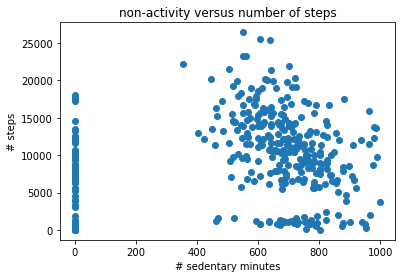

In [121]:
# your code here
plt.scatter(fitbit["Minutes Sedentary"], fitbit["Steps"])
plt.title('non-activity versus number of steps')
plt.xlabel('# sedentary minutes')
plt.ylabel('# steps')
plt.show()

In [123]:
"""
There are kinda 3 'data-clusters'
At the left you see very low (or 0) sedentary minutes with high variation in the number of steps.
this person can apparently put a lot of steps in a small amount of time (runs? manual uploads?) and can have very little 
sedentary minutes and still have little steps (might be due to other activities, like cycling).

At the bottom right there is a more or less straigt line at the base (small nr of steps) that ranges from ~450-950 sedentary minutes. 
There is no correlation between the inactivity and number of steps here (straigt line)

The 'cloud' a bit higher up indicates a slight negative relationship between the amount of sedentary minutes and steps.
this makes sense if the only (or main) activity you usually do involves steps.

"""

"\nThere are kinda 3 'data-clusters'\nAt the left you see very low (or 0) sedentary minutes with high variation in the number of steps.\nthis person can apparently put a lot of steps in a small amount of time (runs? manual uploads?) and can have very little \nsedentary minutes and still have little steps (might be due to other activities, like cycling).\n\nAt the bottom right there is a more or less straigt line at the base (small nr of steps) that ranges from ~450-950 sedentary minutes. \nThere is no correlation between the inactivity and number of steps here (straigt line)\n\nThe 'cloud' a bit higher up indicates a slight negative relationship between the amount of sedentary minutes and steps.\nthis makes sense if the only (or main) activity you usually do involves steps.\n\n"

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [125]:
# your code here
print(fitbit["MinutesOfSleep"].corr(fitbit["Steps"], method='pearson'))
print(fitbit["MinutesOfSleep"].corr(fitbit["Steps"], method='spearman'))

0.1309856595083638
0.09310892758263727


#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

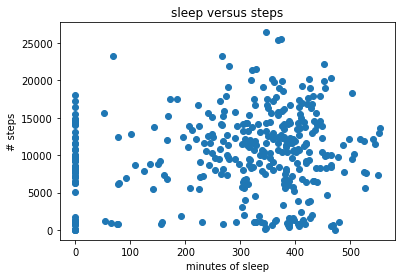

In [126]:
# your code here
plt.scatter(fitbit["MinutesOfSleep"], fitbit["Steps"])
plt.title('sleep versus steps')
plt.xlabel('minutes of sleep')
plt.ylabel('# steps')
plt.show()

In [128]:
"""
Seems like this person doesnot always records his/her sleep (at least, I hope he/she does sleep), indicated by the vertical 'line' at zero.
For the other part of the data there does not seem to be a clear relationship.
"""

"\nSeems like this person doesnot always records his/her sleep (at least, I hope he/she does sleep), indicated by the vertical 'line' at zero.\nFor the other part of the data there does not seem to be a clear relationship.\n"

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [129]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [131]:
# your code here
cor_fit = fitbit[columns].corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [138]:
# your code here
print(cor_fit["Steps"].sort_values(ascending=False))

#minutes of very active

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64


# Challenge 3

Read the `time_grades` dataset from the `data` folder


Save your data in a variable called `time_grades`.

In [141]:
# your code here
time_grades = pd.read_csv('C:/Users/jetsa/data_analytics202103_module_2/labs/module_2/Pivot-Table-Correlation/data/time_grades.csv')
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the `time_grades` dataset.

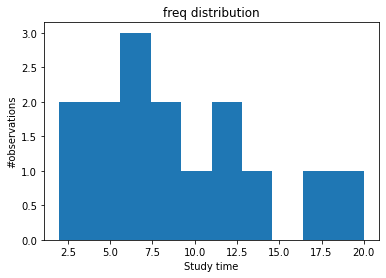

In [150]:
# your code here
plt.hist(time_grades["Study time"])
plt.title('freq distribution')
plt.xlabel('Study time')
plt.ylabel('#observations')
plt.show()

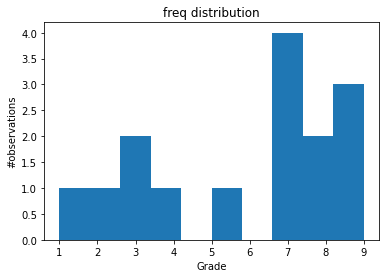

In [151]:
plt.hist(time_grades["Grade"])
plt.title('freq distribution')
plt.xlabel('Grade')
plt.ylabel('#observations')
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [153]:
# your code here
print(time_grades["Study time"].corr(time_grades["Grade"], method = 'pearson'))
print(time_grades["Study time"].corr(time_grades["Grade"], method = 'spearman'))


0.7980456073578858
0.819658753036942


In [154]:
"""
(almost) positive linear relationship
"""

'\n(almost) positive linear relationship\n'

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

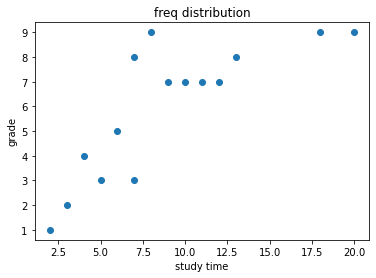

In [155]:
# your code here
plt.scatter(time_grades["Study time"], time_grades["Grade"])
plt.title('freq distribution')
plt.xlabel('study time')
plt.ylabel('grade')
plt.show()


In [156]:
"""
Seems not to be linear but asymptotic: at a certain point, more studying wont help you.
"""

'\nSeems not to be linear but asymptotic: at a certain point, more studying wont help you.\n'

#### Could you explain the difference between Pearson and Spearman correlations?

In [157]:
"""
Pearson tries to draw the best fitting straight line between all observations.
Spearman does not assume linearity and therefore the line that Spearman thinks fits best, is not necessarily straight.
"""

'\nPearson tries to draw the best fitting straight line between all observations.\nSpearman does not assume linearity and therefore the line that Spearman thinks fits best, is not necessarily straight.\n'